# Lizard, fish, and bat: an Escher tiling of the plane

Today we'll make a simplified version of this figure computationally.

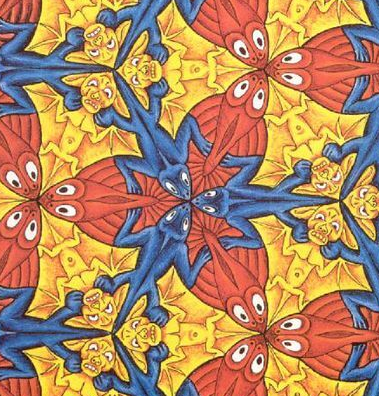 

In [15]:
# load the plot package and define some functions for plotting shapes

using Plots

function plotline!(P; color=:blue, title="", xylim=10, style=:solid) 
    plot!(P[1,:], P[2,:], series_type=:path, color=color, linestyle=style)
    plot!(aspect_ratio=1, legend=:none)
    plot!(xlim=(-xylim,xylim), ylim=(-xylim,xylim))
    plot!(title=title, size=(400,400))
end

function plotline(P; color=:blue, title="", xylim=10, style=:solid)
    plot()                  
    plotline!(P, color=color, title=title, xylim=xylim, style=style)  
end

function plotshape!(P; color=:blue, title="", xylim=10, xlim=0, ylim=0, size=(400, 400)) 
    plot!(P[1,:], P[2,:], series_type=:path, fill=true, color=color, alpha=0.4)
    plot!(aspect_ratio=1, legend=:none)
    if xlim != 0 && ylim!=0
        plot!(xlim=(-xlim,xlim), ylim=(-ylim,ylim))
    else
        plot!(xlim=(-xylim,xylim), ylim=(-xylim,xylim))
    end
    plot!(title=title, size=size)
end

function plotshape(P; color=:blue, title="", xylim=10, xlim=0, ylim=0)
    plot()
    if xlim != 0 && ylim!=0
        plotshape!(P, color=color, title=title, xlim=xlim, ylim=ylim) 
    else
        plotshape!(P, color=color, title=title, xylim=xylim) 
    end 
end

plotshape (generic function with 1 method)

# 1. Draw a lizard

### (a) Draw the right half

Trace a lizard onto a sheet of paper. Put down a coordinate system with the lizard's
nose at the origin and the $x$ axis going down the back of the lizard towards its tail.

Label the vertices of its right side as A, B, C, ..., and estimate the positions of those
points as 2d vectors. Put the vectors in a matrix and plot using `plotline`.


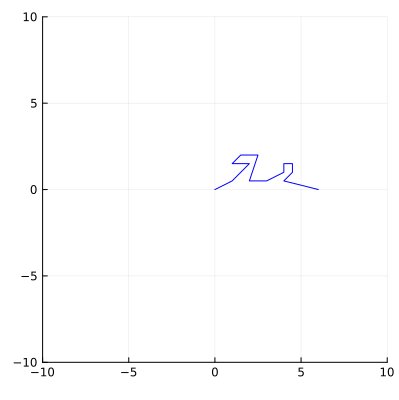

In [2]:
# estimate the positions of the vertices and fill in...
A = [0; 0]
B = [1; 0.5]
C = [2; 1.5]
D = [1; 1.5]
E = [1.5; 2]
F = [2.5; 2]
G = [2; 0.5]
H = [3; 0.5]
I = [4; 1]
J = [4; 1.5]
K = [4.5; 1.5]
L = [4.5; 1]
M = [4; 0.5]
N = [6; 0]

lizard_right = [A B C D E F G H I J K L M N]
plotline(lizard_right)

### (b) Draw the left half

The lizard should exactly symmetric, so get it by reflecting the right half about the y axis, rather than estimating its points. More thought, less work!

In [3]:
lizard_left = [1 0; 0 -1]*lizard_right

2×14 Matrix{Float64}:
 0.0   1.0   2.0   1.0   1.5   2.5  …   4.0   4.0   4.5   4.5   4.0  6.0
 0.0  -0.5  -1.5  -1.5  -2.0  -2.0     -1.0  -1.5  -1.5  -1.0  -0.5  0.0

### (c) Put the halves together and draw --oops!

If we put the right and left halves together as is, we get a line running 
down the middle of the lizard!

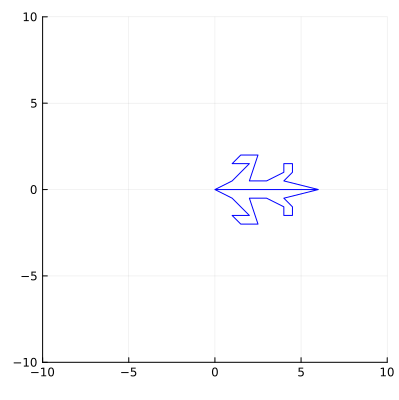

In [4]:
lizard = [lizard_right lizard_left]

plotline(lizard, color=:blue)

### (d) Reverse the order of the left half

That line down the middle appears because both the left and right halves
are given in `[head ... tail]`  order. When we stack the left and right
together to get `[head ... tail head ... tail]` the plot zips from tail
to the head in the halfway through.

Fix this by reversing the order of points in the left half, as follows.

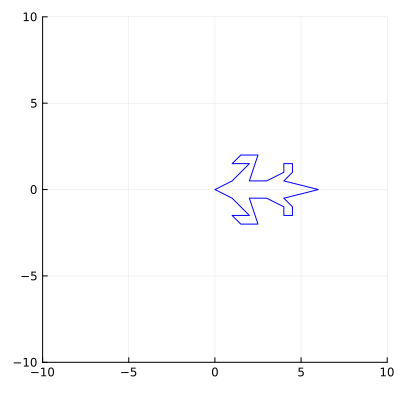

In [5]:
lizard = [lizard_right reverse(lizard_left, dims=2)]

plotline(lizard, color=:blue)

You might want to investigate how the `reverse` function works by 
executing `reverse(lizard_left, dims=2)` and comparing it to `lizard_left`.

### (e) Fill with color

Replot the corrected lizard using `plotshape`, which fills the shape with color.

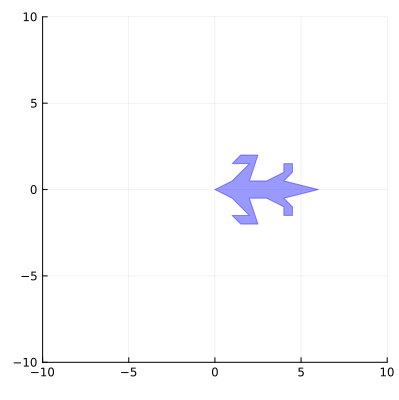

In [6]:
plotshape(lizard, color=:blue)

### (f) Rotate the lizard

Draw the three central lizards by rotating the first. Remember, we're
representing the lizard as a matrix of its vertices. So we can rotate
it by multiplying with a rotation matrix. 

Since we'll be using a few different rotation matrices, let's write a
function that builds one for a given angle $\theta$.

In [7]:
"return the rotation matrix for angle θ"
rotation(θ) =  [cos(θ) -sin(θ); sin(θ) cos(θ)]

rotation

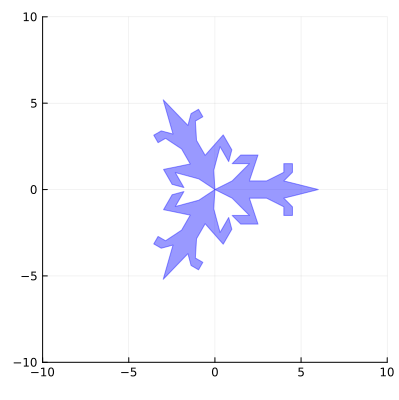

In [8]:

plotshape(lizard, color=:blue)
θ = 2pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
plotshape!(r*lizard, color=:blue)
θ = 4pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
plotshape!(r*lizard, color=:blue)

# 2. Draw a fish

The tail of the fish is already defined by the head and arm of the lizard.

We need to 
  * specify a few more points for the fish's fins and head to complete its right side
  * reflect the right side about the line through the origin at $\theta = \pi/3$
  * put the left and right sides together (reversing the left as before) and plot
  
You can reflect the right half of the fish about the $\theta = \pi/3$ line by
  1. rotating it by $-\pi/3$ 
  2. reflecting the rotated form about the $x$ axis
  3. rotating back by $\pi/3$ 
Each of those operations is a matrix. Multiply the three matrices together 
to get a single matrix representing the reflection about the $\theta = \pi/3$ line.

Do this, combine the left and right sides of the fish as before, and then make
a plot of the fish. If this is challenging, try making four plots showing 
the right half of the fish and what it looks like after each of steps
1,2,3 above.

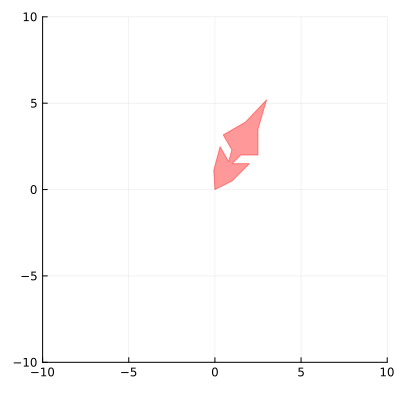

In [9]:
# estimate the positions of the vertices and fill in...
A = [0; 0]
B = [1; 0.5]
C = [2; 1.5]
D = [1; 1.5]
E = [1.5; 2]
F = [2.5; 2]
G = [2.5; 3.5]
H = [3; 3*sqrt(3)]


fish_right = [A B C D E F G H]
θ = pi/3
rθ = [cos(θ) -sin(θ); sin(θ) cos(θ)]*[1 0; 0 -1]*[cos(-θ) -sin(-θ); sin(-θ) cos(-θ)]
fish_left = rθ*fish_right
fish = [fish_right reverse(fish_left, dims=2)]
plotshape(fish, color=:red)

# 3. Plot a trio of fishes and lizards

Just rotate the original pair by $2\pi/3$ and $4\pi/3$ and plot all six
shapes together. 

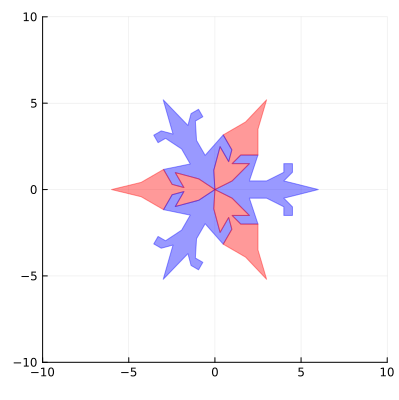

In [10]:
plotshape(lizard, color=:blue)
plotshape!(fish, color=:red)
θ = 2pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
plotshape!(r*lizard, color=:blue)
plotshape!(r*fish, color=:red)
θ = 4pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
plotshape!(r*lizard, color=:blue)
plotshape!(r*fish, color=:red)

# 4. Plot the bat

### (a) Right half of bat

The bat is completely defined by the outlines of the fish and lizard, 
so we don't need any new points to draw its outline. We can get its 
right half by following from the head of the fish to the elbow of
the lizard, and then along the lizard's flank to its tail. 

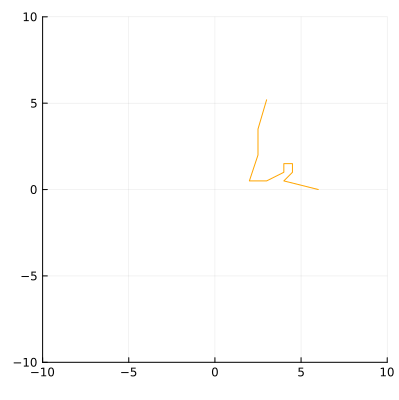

In [11]:
# estimate the positions of the vertices and fill in...
A = [3; 3*sqrt(3)]
B = [2.5; 3.5]
C = [2.5; 2]
D = [2.5; 2]
E = [2; 0.5]
F = [3; 0.5]
G = [4; 1]
H = [4; 1.5]
I = [4.5; 1.5]
J = [4.5; 1]
K = [4; 0.5]
L = [6; 0]
bat_right = [A B C D E F G H I J K L]
plotline(bat_right, color=:orange)

### (b) Left half of bat: reflection about displaced axis!

To get the left half of the bat, we have to reflect the right half about the dotted line above.
How to do that?
  1. translate the bat leftwards so its nose is at the origin
  2. rotate by $\pi/3$ so the dotted line is along the $x$ axis
  3. reflect about the $x$ axis
  4. rotate back by $-\pi/3$
  5. translate the bat rightwards so its nose ends up where it started

*Hint:* To translate the bat so its nose is at the origin, subtract the 
coordinates of the nose from all the vertices of the bat. In Julia, you
can subtract a vector $c$ from each of the columns of a matrix $X$ with
the syntax `X .- c`. Use this syntax for steps 1 and 5 above (changing 
the symbols `X` and `c` to the names of your bat vertex matrix and the
vector for the bat's nose).

*Hint:* You might want to make six plots, the original bat half
and what it looks like after each of steps 1 through 5 above.
That'll help diagnose any errors.

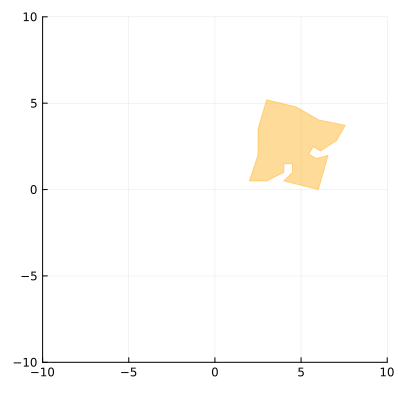

In [12]:
bat_right = bat_right .- [3; 3*sqrt(3)]
θ = -pi/3
rθ = [cos(θ) -sin(θ); sin(θ) cos(θ)]*[1 0; 0 -1]*[cos(-θ) -sin(-θ); sin(-θ) cos(-θ)]
bat_left = rθ*bat_right
bat_right = bat_right .+ [3; 3*sqrt(3)]
bat_left = bat_left .+ [3; 3*sqrt(3)]
bat = [bat_right reverse(bat_left, dims=2)]
plotshape(bat, color=:orange)

# 5. Plot them all together

Plot three lizards, three fishes, and three bats rotated around the origin. 

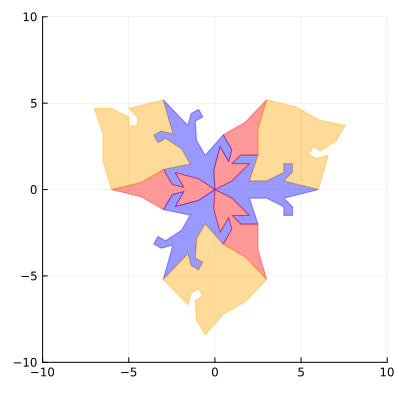

In [13]:
plotshape(lizard, color=:blue)
plotshape!(fish, color=:red)
plotshape!(bat, color=:orange)
θ = 2pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
plotshape!(r*lizard, color=:blue)
plotshape!(r*fish, color=:red)
plotshape!(r*bat, color=:orange)
θ = 4pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
plotshape!(r*lizard, color=:blue)
plotshape!(r*fish, color=:red)
plotshape!(r*bat, color=:orange)

# 6. Challenge: fill the plane with lizard, fishes, and bats

like in the original Escher print

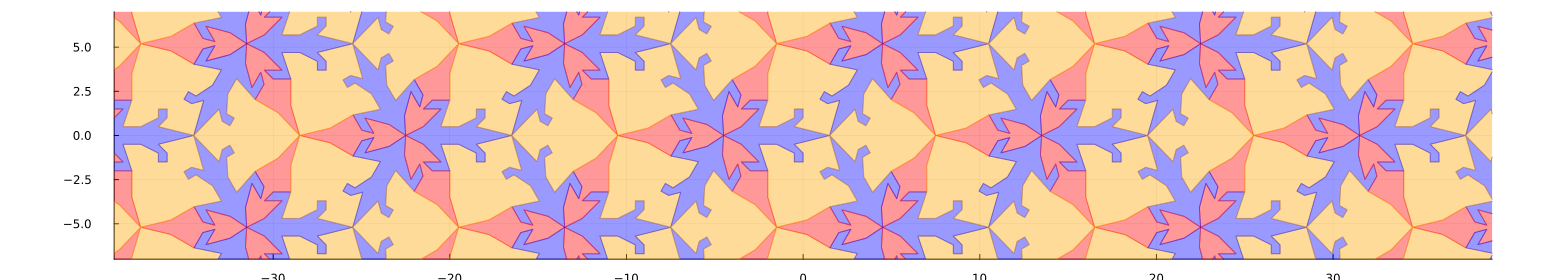

In [16]:
xrange = 39
yrange = 7
xlooprange = ceil((xrange - (2cos(pi/3)+0.5sin(pi/3)))/4.5)+1
ylooprange = ceil((yrange - (2sin(2pi/3)-0.5cos(2pi/3)))/(3sqrt(3)))+2

#xyrange = 9-(2sin(2pi/3)-0.5cos(2pi/3))
plot()
θ = 2pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
lizardr = r*lizard
fishr = r*fish
batr = r*bat
θ = 4pi/3
r =  [cos(θ) -sin(θ); sin(θ) cos(θ)]
lizardrr = r*lizard
fishrr = r*fish
batrr = r*bat

for i in range(-(ylooprange-1), (ylooprange-1))
    if mod(i, 2) == 0
        for j in range(-(floor((xlooprange-1)/2)/2), (floor((xlooprange-1)/2)/2))
            plotshape!(lizard .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:blue)
            plotshape!(fish .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:red)
            plotshape!(bat .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:orange)
            
            plotshape!(lizardr .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:blue)
            plotshape!(fishr .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:red)
            plotshape!(batr .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:orange)
            
            plotshape!(lizardrr .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:blue)
            plotshape!(fishrr .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:red)
            plotshape!(batrr .+ [j*18 - 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:orange)
        end
    else
        for j in range(-(floor((xlooprange-1)/2)/2-0.5mod(xlooprange, 2)), (floor((xlooprange-1)/2)/2-0.5mod(xlooprange, 2)))
            plotshape!(lizard .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:blue)
            plotshape!(fish .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:red)
            plotshape!(bat .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:orange)
            
            plotshape!(lizardr .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:blue)
            plotshape!(fishr .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:red)
            plotshape!(batr .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:orange)
            
            plotshape!(lizardrr .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:blue)
            plotshape!(fishrr .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:red)
            plotshape!(batrr .+ [j*18 + 4.5mod(xlooprange + 1, 2); i*3sqrt(3)], color=:orange)
        end
    end
end
        
plotshape!([0; 0], xlim = xrange, ylim = yrange, size=(400*xrange/10, 400*yrange/10), color=:orange)
#print(xlooprange, " ", ylooprange)